In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train) , (X_test, y_test) = datasets.cifar10.load_data()

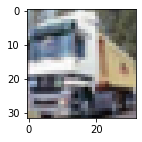

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[1])

In [ ]:
y_train = y_train.reshape(-1)
y_train.shape

(50000,)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
model = keras.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(100,activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )
his = model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 9s 4ms/step - loss: 2.3053 - accuracy: 0.1623
Epoch 2/5
1563/1563 [==============================] - 5s 4ms/step - loss: 1.8880 - accuracy: 0.3013
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7148 - accuracy: 0.3813
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6102 - accuracy: 0.4187
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5710 - accuracy: 0.4319


In [ ]:

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),   
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )
his = cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7074 - accuracy: 0.3745
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1534 - accuracy: 0.5981
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9982 - accuracy: 0.6531
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9084 - accuracy: 0.6854
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8353 - accuracy: 0.7122
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7847 - accuracy: 0.7307
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7288 - accuracy: 0.7477
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6926 - accuracy: 0.7589
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6585 - accuracy: 0.7729
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.620

In [ ]:
y_test = y_test.reshape(-1)
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9181 - accuracy: 0.6998


[0.918101966381073, 0.6998000144958496]

In [ ]:
y_p = cnn.predict(X_test[:10])
y_pred = [np.argmax(i) for i in y_p]
y_pred

[3, 8, 8, 0, 6, 6, 1, 2, 3, 1]

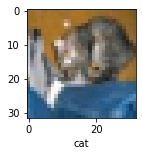

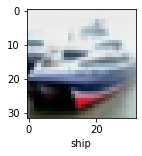

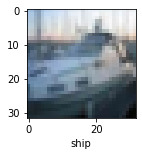

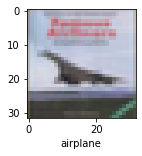

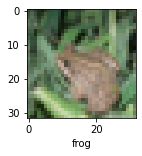

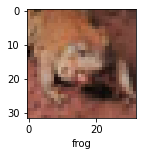

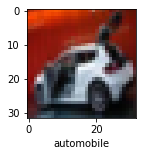

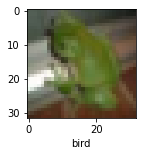

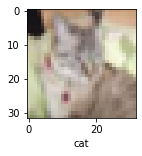

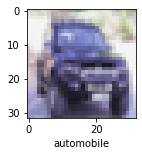

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
for i in range(10):
    plt.figure(figsize=(2,2))
    plt.imshow(X_test[i])
    plt.xlabel(classes[y_pred[i]])
    plt.show()
